In [21]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")
#hallo
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [22]:
data = []
for file in os.listdir('Data'):
        with open('Data/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])
            

In [23]:
anh = Path("Results/anhang.txt")
anh.touch()
nf = open(anh,"w")

dir = Path("Results/amplitudes.txt")
dir.touch()
countrate = open(dir,"w")
countrate.write("pressure\tg1_amplitude\tg1_amplitudeerr\tg2_amplitude\tg2_amplitudeerr\tg3_amplitude\tg3_amplitudeerr\tg4_amplitude\tg4_amplitudeerr\n")

dir2 = Path("Results/center.txt")
dir2.touch()
center = open(dir2,"w")
center.write("pressure\tg1_center\tg1_centererr\tg2_center\tg2_centererr\tg3_center\tg3_centererr\tg4_center\tg4_centererr\n")

101

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3237
    # data points      = 750
    # variables        = 9
    chi-square         = 1894.09145
    reduced chi-square = 2.55612882
    Akaike info crit   = 712.816014
    Bayesian info crit = 754.396672
##  Warning: uncertainties could not be estimated:
    g2_center:     at boundary
    g3_center:     at boundary
[[Variables]]
    g1_amplitude:  33624.9114 (init = 1)
    g1_center:     197.812278 (init = 200)
    g1_sigma:      70.0343176 (init = 0.3)
    g2_amplitude:  32971.6403 (init = 1)
    g2_center:     350.000000 (init = 300)
    g2_sigma:      45.6311165 (init = 0.3)
    g3_amplitude:  31196.5811 (init = 1)
    g3_center:     500.000000 (init = 550)
    g3_sigma:      68.9436805 (init = 0.3)
    g1_fwhm:       164.918212 == '2.3548200*g1_sigma'
    g1_height:     191.540376 == '0.3989423*

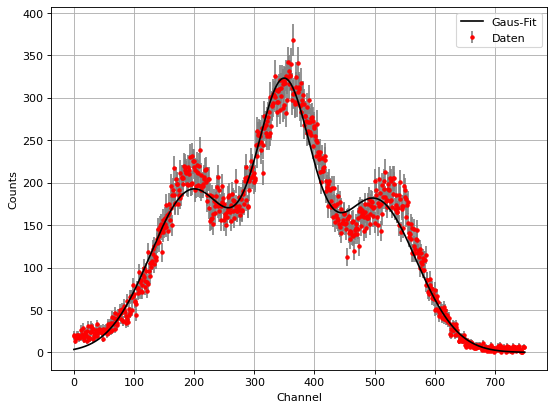

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 550
    # variables        = 3
    chi-square         = 1419.42626
    reduced chi-square = 2.59492919
    Akaike info crit   = 527.449363
    Bayesian info crit = 540.379118
[[Variables]]
    amplitude:  23905.4504 +/- 249.167201 (1.04%) (init = 34626)
    center:     1043.93000 +/- 0.60135890 (0.06%) (init = 1047.937)
    sigma:      57.0593861 +/- 0.45793661 (0.80%) (init = 58)
    fwhm:       134.364584 +/- 1.07835830 (0.80%) == '2.3548200*sigma'
    height:     167.139817 +/- 2.19274574 (1.31%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.120


<Figure size 432x288 with 0 Axes>

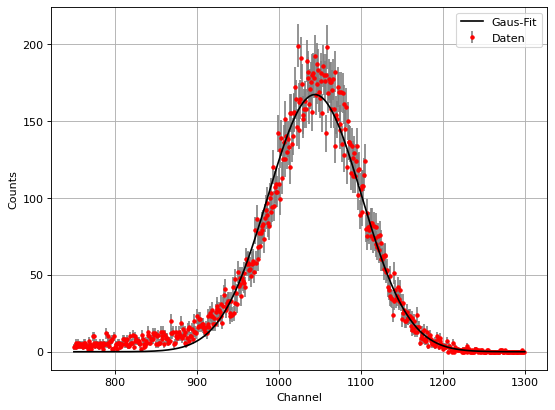

<Figure size 432x288 with 0 Axes>

In [24]:
for i in data:

    if i[0] == '55Torr':
        res = f.gaus3fit(i,0,750,200,150,250,300,250,350,550,500,600)
        torr55_3 = f.gaus_fit(i[0],3,res[0],res[1],res[2])
        plt.savefig("Results/55Torr3.pdf")
        nf.write(f.gausfit_table(torr125_3))

        res = f.gaus1fit(i,750,1300,1100,900,1200)
        torr55_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/55Torr1.pdf")
        nf.write(f.gausfit_table(torr125_3))



        amp1,amp2,amp3,amp4 = torr125_3.out.params["g1_amplitude"].value,torr125_3.out.params["g2_amplitude"].value,torr125_3.out.params["g3_amplitude"].value,'none'
        amperr1,amperr2,amperr3,amperr4 = torr125_3.out.params["g1_amplitude"].stderr,torr125_3.out.params["g2_amplitude"].stderr,torr125_3.out.params["g3_amplitude"].stderr,'none'
        countrate.write(str(i[0].split("Torr")[0])+"\t"+str(amp1)+"\t"+str(amperr1)+"\t"+str(amp2)+"\t"+str(amperr2)+"\t"+str(amp3)+"\t"+str(amperr3)+"\t"+str(amp4)+"\t"+str(amperr4)+"\n")

        center1,center2,center3,center4 = torr125_3.out.params["g1_center"].value,torr125_3.out.params["g2_center"].value,torr125_3.out.params["g3_center"].value,'none'
        centererr1,centererr2,centererr3,centererr4 = torr125_3.out.params["g1_center"].stderr,torr125_3.out.params["g2_center"].stderr,torr125_3.out.params["g3_center"].stderr,'none'
        center.write(str(i[0].split("Torr")[0])+"\t"+str(center1)+"\t"+str(centererr1)+"\t"+str(center2)+"\t"+str(centererr2)+"\t"+str(center3)+"\t"+str(centererr3)+"\t"+str(center4)+"\t"+str(centererr4)+"\n")








    if i[0] == '500Torr':
        res = f.gaus1fit(i,0,1200)
        torr500_1 = f.gaus_fit(i[0],1,res[0],res[1],res[2])
        plt.savefig("Results/500Torr.pdf")
        nf.write(f.gausfit_table(torr500_1))




nf.close()
countrate.close()
center.close()